In [3]:
import re
import pandas as pd
import demoji
import emoji

df = pd.read_csv('Ps_train.csv')

In [4]:
df

,content,labels
0,தென்காசி தொகுதி புதிய தமிழகம் கட்சி வேட்பாளர் ...,Neutral
1,அண்ணன் இதனை சூசகமாக 11 மாதங்கள் முன்பே பேட்டிய...,Substantiated
2,ஒரு வருடம் ஆகி விட்டது இந்த துயரம் நேர்ந்து......,Opinionated
3,"எடப்பாடியை கண்டுகொள்ளாத ""எடப்பாடி""🫢\n ---\nஆதர...",Positive
4,எங்களின் அரசியல் அடுத்த தலைமுறைக்குமானது \n#மக...,Opinionated
...,...,...
4347,"பள்ளி , கல்லூரி படிப்பை இலவசமாக தாருங்கள் பேரு...",Substantiated
4348,இஸ்லாமியர்களின் பாதுகாவலர்கள் திமுகவினரா? உண்ம...,Opinionated
4349,டெல்டா மாவட்ட மக்களோடு... மக்களாக 😍\n\n#மக்களி...,Positive
4350,நன்றி,Opinionated


<Axes: xlabel='labels'>

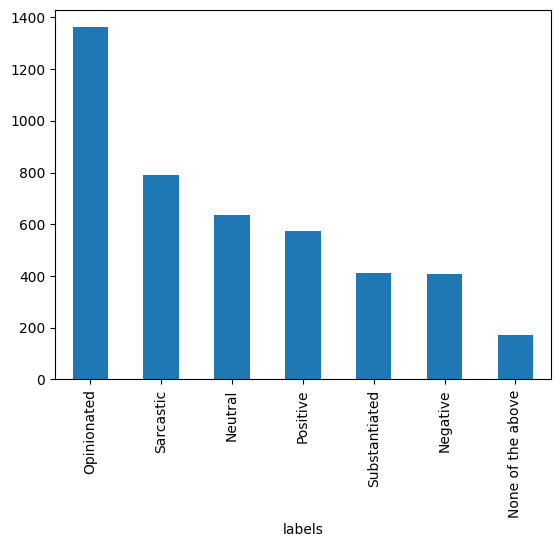

In [6]:
import matplotlib.pyplot as plt

df['labels'].value_counts().plot(kind='bar')

172.52711397058823


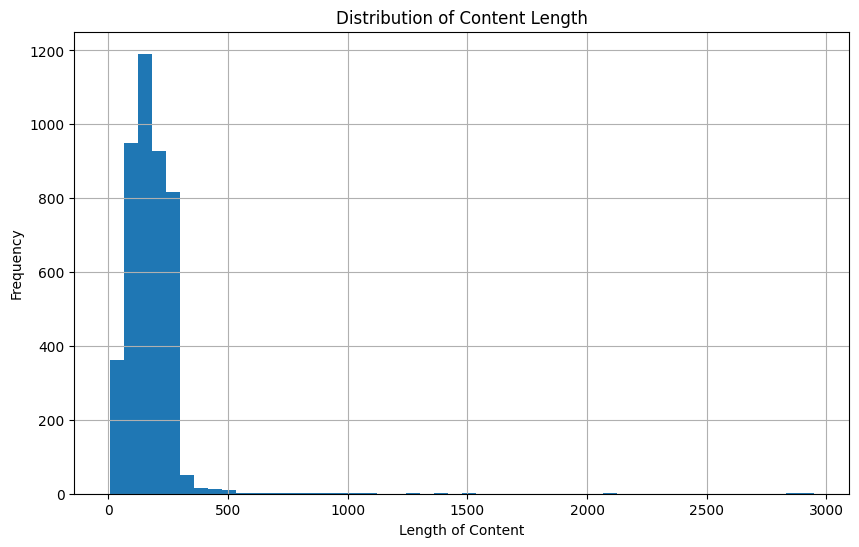

In [8]:
plt.figure(figsize=(10, 6))
df['content'].str.len().hist(bins=50)
plt.title('Distribution of Content Length')
plt.xlabel('Length of Content')
plt.ylabel('Frequency')
plt.grid(True)


avg_len = df['content'].str.len().mean()
print(avg_len)

def remove_hashtags_and_emojis(text):
    text = re.sub(r'#\S+', '<hashtag/>', text)
    emoji_pattern = re.compile(
        "[\U0001F600-\U0001F64F"
        "\U0001F300-\U0001F5FF" 
        "\U0001F680-\U0001F6FF" 
        "\U0001F1E0-\U0001F1FF" 
        "\U00002700-\U000027BF" 
        "\U000024C2-\U0001F251" 
        "\U0001F900-\U0001F9FF" 
        "\U0001FA70-\U0001FAFF" 
        "\U00002500-\U00002BEF" 
        "]+", flags=re.UNICODE
    )
    text = emoji_pattern.sub('', text)
    return text

def strip_all_entities(text): 
    text = text.replace('|','').replace('\r', '').replace('\t', ' ').replace('\n', ' ').lower()
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    # text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    # banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    # table = str.maketrans('', '', banned_list)
    # text = text.translate(table)
    return text

def strip_all_entities(text):
    text = text.replace('|', '').replace('\r', '').replace('\t', ' ').replace('\n', ' ').replace('"','').lower()
    text = re.sub(r"(?:@|https?://)\S+", "", text)
    text = re.sub(r"#(\w+)", r"\1", text)
    text = re.sub(r"\s\s+", " ", text).strip()
    return text


def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet))
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet))
    return new_tweet2

def strip_emoji(text):
    return demoji.replace(text, '')


def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text):
    return re.sub("\s\s+" , " ", text)

df2 = df.copy()
df2['content'] = df2['content'].apply(remove_mult_spaces)
df2 ['content'] = df2['content'].apply(remove_hashtags_and_emojis)
df2['content'] = df2['content'].apply(clean_hashtags)
df2['content'] = df2['content'].apply(strip_emoji)
df2['content'] = df2['content'].apply(strip_all_entities)


In [9]:
def remove_hashtags_and_emojis(text):
    text = re.sub(r'#\S+', '', text)
    emoji_pattern = re.compile(
        "[\U0001F600-\U0001F64F"
        "\U0001F300-\U0001F5FF" 
        "\U0001F680-\U0001F6FF" 
        "\U0001F1E0-\U0001F1FF" 
        "\U00002700-\U000027BF" 
        "\U000024C2-\U0001F251" 
        "\U0001F900-\U0001F9FF" 
        "\U0001FA70-\U0001FAFF" 
        "\U00002500-\U00002BEF" 
        "]+", flags=re.UNICODE
    )
    text = emoji_pattern.sub('', text)
    return text

def replace_hashtags_and_emojis(text):
    # Remove hashtags
    text = re.sub(r'#\S+', '<hashtag/>', text)
    
    # Replace emojis with textual representation
    text = emoji.demojize(text)
    text = re.sub(r':([\w_]+):', r'<\1_emoji/>', text)  # Format to <emoji_name/>
    
    return text


def strip_all_entities(text): 
    text = text.replace('|','').replace('\r', '').replace('\t', ' ').replace('\n', ' ').lower()
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    # text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    # banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    # table = str.maketrans('', '', banned_list)
    # text = text.translate(table)
    return text

def strip_all_entities(text):
    text = text.replace('|', '').replace('\r', '').replace('\t', ' ').replace('\n', ' ').replace('"','').lower()
    text = re.sub(r"(?:@|https?://)\S+", "", text)
    text = re.sub(r"#(\w+)", r"\1", text)
    text = re.sub(r"\s\s+", " ", text).strip()
    return text


def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet))
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet))
    return new_tweet2

def strip_emoji(text):
    return demoji.replace(text, '')


def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text):   
    return re.sub("\s\s+" , " ", text)

df2 = df.copy()
df2['content'] = df2['content'].apply(remove_mult_spaces)
df2 ['content'] = df2['content'].apply(replace_hashtags_and_emojis)
df2['content'] = df2['content'].apply(clean_hashtags)
df2['content'] = df2['content'].apply(strip_emoji)
df2['content'] = df2['content'].apply(strip_all_entities)
df2

<>:47: SyntaxWarning: invalid escape sequence '\w'
<>:65: SyntaxWarning: invalid escape sequence '\s'
<>:47: SyntaxWarning: invalid escape sequence '\w'
<>:65: SyntaxWarning: invalid escape sequence '\s'
C:\Users\nithi\AppData\Local\Temp\ipykernel_22904\3362554710.py:47: SyntaxWarning: invalid escape sequence '\w'
  new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet))
C:\Users\nithi\AppData\Local\Temp\ipykernel_22904\3362554710.py:65: SyntaxWarning: invalid escape sequence '\s'
  return re.sub("\s\s+" , " ", text)


,Id,content
0,PS_01,இஸ்லாமிய சகோதரர்களுடன் ரமலான் கொண்டாடிய அதிமுக...
1,PS_02,ஓபிஎஸ் - எடப்பாடி போட்டா போட்டி! திடீரென பணிகள...
2,PS_03,இன்றைய பரப்புரை: நாம் தமிழர் கட்சி தலைமை ஒருங்...
3,PS_04,<kyrgyzstan emoji/><studio microphone emoji/> ...
4,PS_05,டாஸ்மாக்ல மட்டும்தான் கருணாநிதி அவர்களின் பெயர...
...,...,...
539,PS_540,அண்ணன் திருமாவின் குரலுக்கு முன்னாள் முன்னாள் ...
540,PS_541,<hashtag/> <fire emoji/> <hashtag/> <fire emoj...
541,PS_542,தமிழர்களை ஒடுக்குவதில் மட்டுமே தீவிரமாக செயல்ப...
542,PS_543,நாகபட்டினம் தொகுதி mp 20 ஆண்டுகளாக மக்கள் பிரத...


In [10]:
df2.to_csv('cleaned_PS_test.csv', index=False)